**Задание 1.**

В этом домашнем задании вы будете продолжать работать с датасетом вин, который содержит химические анализы вин трех различных сортов, произведенных в одном регионе Италии. Используя алгоритм дерева принятия решений, ваша задача — разработать модель, которая сможет классифицировать вино по его сорту на основе анализа.



**Шаги выполнения задания:**

**Загрузка данных:** Используйте функцию load_wine из sklearn.datasets для загрузки датасета. Изучите полученные данные, обратите внимание на признаки и целевую переменную.



**Подготовка данных:** Создайте DataFrame из полученных данных. Для этого используйте данные о признаках и целевой переменной. Назначьте названия колонок согласно feature_names датасета.



**Разделение данных:** Разделите ваш датасет на обучающую и тестовую выборки с помощью train_test_split. Установите размер тестовой выборки в 30% и зафиксируйте random_state.



**Обучение модели:** Обучите модель дерева принятия решений без указания гиперпараметров. Оцените качество модели на тестовой выборке с использованием метрик classification_report и confusion_matrix.



**Настройка гиперпараметров:** Теперь создайте и обучите новую модель, на этот раз указав гиперпараметры: max_depth, max_features и random_state. Сравните качество этой модели с предыдущей.



**Визуализация дерева решений:** Используя обученную модель с гиперпараметрами, визуализируйте дерево решений. Убедитесь, что в визуализации четко указаны названия признаков и классы.

In [125]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report

data = load_wine()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target)
dataset = pd.concat([dataset,target.rename('target')],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [126]:
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [127]:
X = dataset.drop(columns='target')
y = dataset[['target']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

prediction_1 = model_1.predict(X_test)
print(f"Classification report:{classification_report(y_test, prediction_1)}")
print(f"Confusion matrix:{confusion_matrix(y_test, prediction_1)}")

Classification report:              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.73      0.94      0.82        17
           2       1.00      0.83      0.91        18

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54

Confusion matrix:[[16  3  0]
 [ 1 16  0]
 [ 0  3 15]]


In [128]:
model_2 = DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=21)
model_2.fit(X_train, y_train)

prediction_2 = model_2.predict(X_test)
print(f"Classification report:{classification_report(y_test, prediction_2)}")
print(f"Confusion matrix:{confusion_matrix(y_test, prediction_2)}")

Classification report:              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.76      0.94      0.84        17
           2       1.00      0.78      0.88        18

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54

Confusion matrix:[[17  2  0]
 [ 1 16  0]
 [ 1  3 14]]


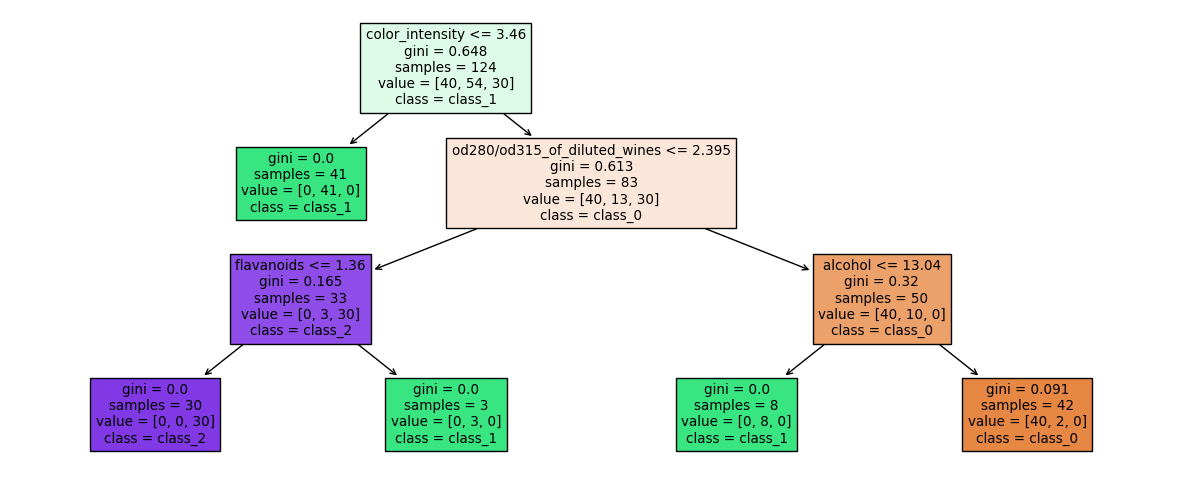

In [130]:
import matplotlib.pyplot as plt

X_cols = data.feature_names
y_cols = [i for i in data.target_names]


plt.figure(figsize=(15,6))
plot_tree(model_2, filled=True, max_depth=4, feature_names=X_cols, class_names=y_cols)
plt.show()

**Задание 2:**

**UCI Adult (скачивать не нужно, у нас есть копия в репозитории):** классифицируйте людей с помощью демографических данных - зарабатывают ли они более 50 000 долларов в год или нет.

DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")



**Очистка тестовых данных:** Удалите из тестового набора данных строки с некорректными метками в целевой переменной "Target". Некорректные метки — это те, которые не соответствуют значениям " >50K." или " <=50K.".



**Кодирование целевой переменной:** Преобразуйте целевую переменную "Target" в обоих наборах данных (обучающем и тестовом) из строкового формата в целочисленный. Кодируйте значения " <=50K" и " <=50K." как 0, а значения " >50K" и " >50K." как 1.



Проделайте анализ данных

**Описательный анализ данных:** Проведите описательный анализ обоих наборов данных (обучающего и тестового), чтобы получить общее представление о данных. Используйте метод .describe(include="all") для получения статистической сводки по всем колонкам.



**Распределение целевой переменной:** Исследуйте распределение целевой переменной "Target" в обучающем наборе данных, используя метод .value_counts(). Это даст вам представление о балансе классов.

In [95]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
data_train['Target'].value_counts()
# Данные уже чистые

# clear = data_train[(data_train['Target'] != " >50K.") & (data_train['Target'] != " <=50K.")].index
# data_train.drop(clear, inplace=True)

Target
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [107]:
X = data_train.drop(columns='Target')
y = data_train['Target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [111]:
y_train = y_train.replace({' <=50K': 0, ' >50K': 1})
y_test = y_test.replace({' <=50K': 0, ' >50K': 1})

In [115]:
df_train = pd.concat([X_train, y_train.rename('Target')], axis=1)
df_test = pd.concat([X_test, y_test.rename('Target')], axis=1)

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 12985 to 15305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             22792 non-null  int64 
 1   Workclass       21516 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   Education       22792 non-null  object
 4   Education_Num   22792 non-null  int64 
 5   Martial_Status  22792 non-null  object
 6   Occupation      21513 non-null  object
 7   Relationship    22792 non-null  object
 8   Race            22792 non-null  object
 9   Sex             22792 non-null  object
 10  Capital_Gain    22792 non-null  int64 
 11  Capital_Loss    22792 non-null  int64 
 12  Hours_per_week  22792 non-null  int64 
 13  Country         22407 non-null  object
 14  Target          22792 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.8+ MB


In [120]:
df_train.describe(include="all")

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
count,22792.000000,21516,2.279200e+04,22792,22792.000000,22792,21513,22792,22792,22792,22792.000000,22792.000000,22792.000000,22407,22792.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,15931,NaN,7310,NaN,10467,2925,9215,19415,15233,NaN,NaN,NaN,20421,NaN
mean,38.560723,NaN,1.892985e+05,NaN,10.079019,NaN,NaN,NaN,NaN,NaN,1060.997016,87.124868,40.439409,NaN,0.239602
std,13.667600,NaN,1.057518e+05,NaN,2.581162,NaN,NaN,NaN,NaN,NaN,7366.917435,403.239566,12.384832,NaN,0.426850
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.174920e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.779500e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.369862e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 15606 to 11550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             9769 non-null   int64 
 1   Workclass       9209 non-null   object
 2   fnlwgt          9769 non-null   int64 
 3   Education       9769 non-null   object
 4   Education_Num   9769 non-null   int64 
 5   Martial_Status  9769 non-null   object
 6   Occupation      9205 non-null   object
 7   Relationship    9769 non-null   object
 8   Race            9769 non-null   object
 9   Sex             9769 non-null   object
 10  Capital_Gain    9769 non-null   int64 
 11  Capital_Loss    9769 non-null   int64 
 12  Hours_per_week  9769 non-null   int64 
 13  Country         9571 non-null   object
 14  Target          9769 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [121]:
df_test.describe(include="all")

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
count,9769.000000,9209,9.769000e+03,9769,9769.000000,9769,9205,9769,9769,9769,9769.000000,9769.000000,9769.000000,9571,9769.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,6765,NaN,3191,NaN,4509,1257,3978,8401,6557,NaN,NaN,NaN,8749,NaN
mean,38.630464,NaN,1.908980e+05,NaN,10.084553,NaN,NaN,NaN,NaN,NaN,1116.499130,87.721363,40.432900,NaN,0.243628
std,13.577409,NaN,1.050746e+05,NaN,2.553044,NaN,NaN,NaN,NaN,NaN,7428.218337,402.328032,12.260349,NaN,0.429293
min,17.000000,NaN,1.930200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.192250e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.794230e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.373210e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [123]:
y_train.value_counts(normalize=True)

Target
0    0.760398
1    0.239602
Name: proportion, dtype: float64

In [124]:
y_train.value_counts()

Target
0    17331
1     5461
Name: count, dtype: int64